In [1]:
import cv2

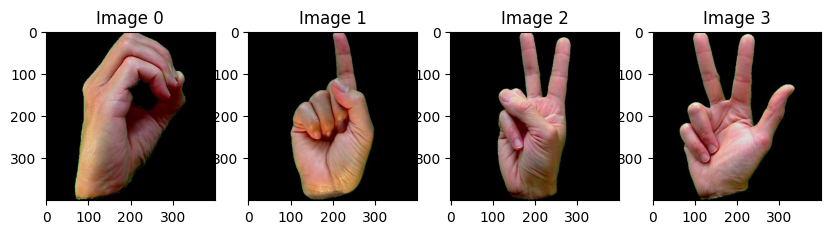

In [2]:
#dataset 0,1,2,3 sign Image
import matplotlib.pyplot as plt
image0=cv2.imread('hand1_0_left_seg_2_cropped.jpeg')
image1=cv2.imread('hand2_1_bot_seg_5_cropped.jpeg')
image2=cv2.imread('hand1_2_top_seg_2_cropped.jpeg')
image3=cv2.imread('hand1_3_top_seg_3_cropped.jpeg')
# Check if images are loaded correctly
if image0 is None or image1 is None or image2 is None or image3 is None:
    print("One or more images could not be loaded. Please check the file paths.")
else:
    # Convert BGR to RGB for displaying with matplotlib
    image0 = cv2.cvtColor(image0, cv2.COLOR_BGR2RGB)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

    # Plot images
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 4, 1)
    plt.imshow(image0)
    plt.title('Image 0')

    plt.subplot(1, 4, 2)
    plt.imshow(image1)
    plt.title('Image 1')

    plt.subplot(1, 4, 3)
    plt.imshow(image2)
    plt.title('Image 2')

    plt.subplot(1, 4, 4)
    plt.imshow(image3)
    plt.title('Image 3')

    plt.show()

In [3]:
import numpy as np

## **what is `Sharp Filter`**
 ##    .sharp filter is filter used to make more accurate apperenc to `Edges` of Image 


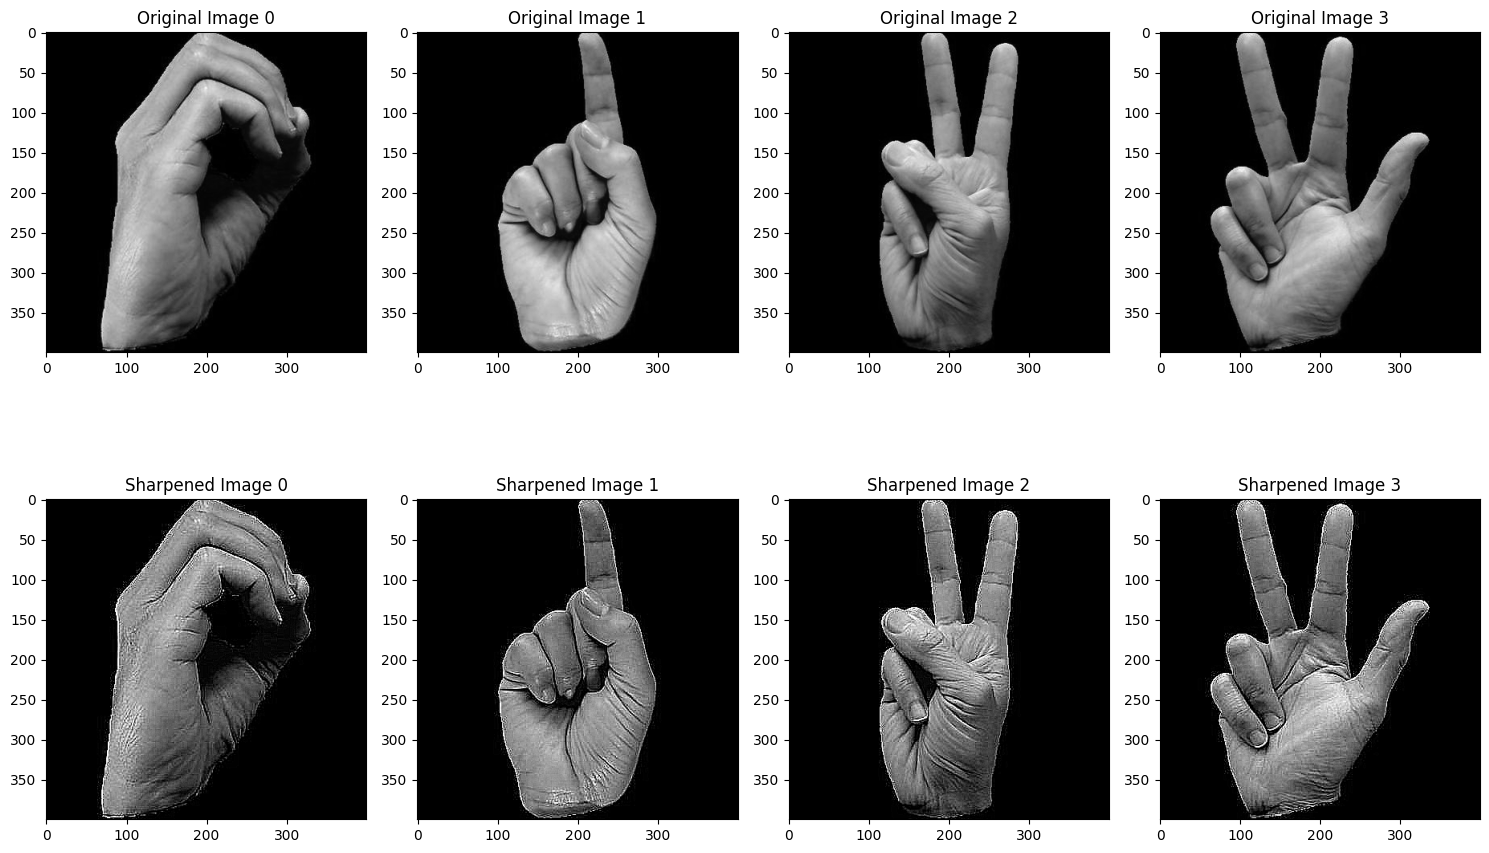

In [4]:
# Function to check if the image is already grayscale
def convert_to_gray(image):
    if len(image.shape) == 3:  # If the image has 3 channels (color image)
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        return image  # If the image is already grayscale

# Convert Images to Grayscale (only if they are not already grayscale)
image0 = convert_to_gray(image0)
image1 = convert_to_gray(image1)
image2 = convert_to_gray(image2)
image3 = convert_to_gray(image3)

# Enhancement using Sharp Filter
sharpening_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

# Apply sharpening filter to each image and store the results separately
sharpened_image0 = cv2.filter2D(image0, -1, sharpening_kernel)
sharpened_image1 = cv2.filter2D(image1, -1, sharpening_kernel)
sharpened_image2 = cv2.filter2D(image2, -1, sharpening_kernel)
sharpened_image3 = cv2.filter2D(image3, -1, sharpening_kernel)

# Plot original and sharpened images
plt.figure(figsize=(15, 10))

# Original images
plt.subplot(2, 4, 1)
plt.imshow(image0, cmap='gray')
plt.title('Original Image 0')

plt.subplot(2, 4, 2)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')

plt.subplot(2, 4, 3)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')

plt.subplot(2, 4, 4)
plt.imshow(image3, cmap='gray')
plt.title('Original Image 3')

# Sharpened images
plt.subplot(2, 4, 5)
plt.imshow(sharpened_image0, cmap='gray')
plt.title('Sharpened Image 0')

plt.subplot(2, 4, 6)
plt.imshow(sharpened_image1, cmap='gray')
plt.title('Sharpened Image 1')

plt.subplot(2, 4, 7)
plt.imshow(sharpened_image2, cmap='gray')
plt.title('Sharpened Image 2')

plt.subplot(2, 4, 8)
plt.imshow(sharpened_image3, cmap='gray')
plt.title('Sharpened Image 3')

plt.tight_layout()
plt.show()


#### Convert Image to Binary Image BY **Segmntion** Of Image one For `object` an Another For `background`

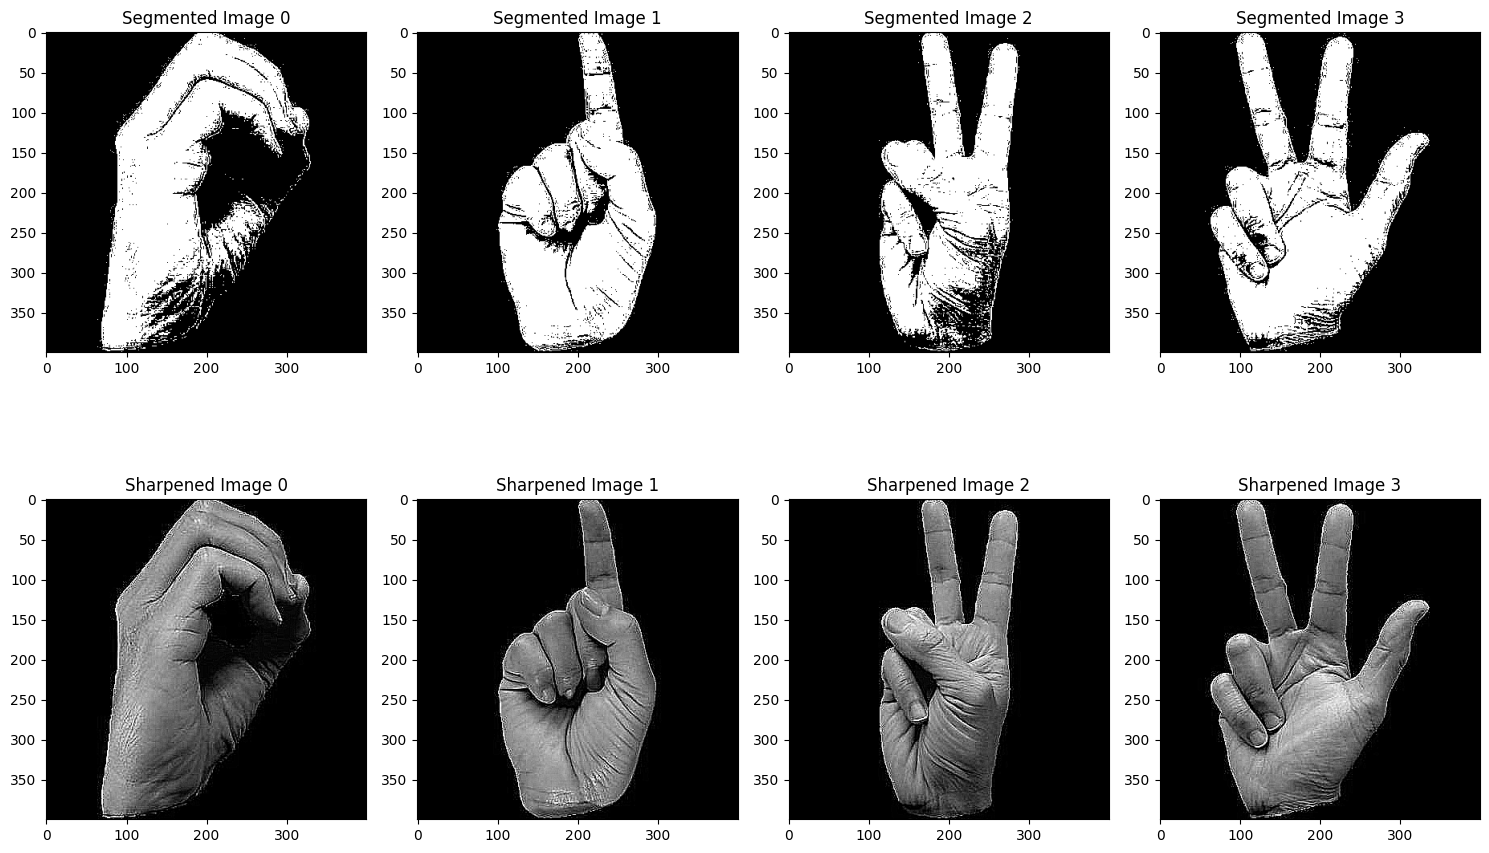

In [5]:
#Segment Using threshold Outs's threshold
ret,Segmented_Image0=cv2.threshold(sharpened_image0,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,Segmented_Image1=cv2.threshold(sharpened_image1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,Segmented_Image2=cv2.threshold(sharpened_image2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,Segmented_Image3=cv2.threshold(sharpened_image3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(15, 10))

# Original images
plt.subplot(2, 4, 1)
plt.imshow(Segmented_Image0, cmap='gray')
plt.title('Segmented Image 0')

plt.subplot(2, 4, 2)
plt.imshow(Segmented_Image1, cmap='gray')
plt.title('Segmented Image 1')

plt.subplot(2, 4, 3)
plt.imshow(Segmented_Image2, cmap='gray')
plt.title('Segmented Image 2')

plt.subplot(2, 4, 4)
plt.imshow(Segmented_Image3, cmap='gray')
plt.title('Segmented Image 3')

# Sharpened images
plt.subplot(2, 4, 5)
plt.imshow(sharpened_image0, cmap='gray')
plt.title('Sharpened Image 0')

plt.subplot(2, 4, 6)
plt.imshow(sharpened_image1, cmap='gray')
plt.title('Sharpened Image 1')

plt.subplot(2, 4, 7)
plt.imshow(sharpened_image2, cmap='gray')
plt.title('Sharpened Image 2')

plt.subplot(2, 4, 8)
plt.imshow(sharpened_image3, cmap='gray')
plt.title('Sharpened Image 3')

plt.tight_layout()
plt.show()

### Segmenting Using **`split Region`**

In [6]:
#Segment Using threshold Split Growing threshold
def is_homogeneous(region, threshold=50):
    """Check if a region is homogeneous based on variance."""
    return np.var(region) < threshold

# Recursive splitting function
def split_region(image, x, y, width, height, threshold):
    """Recursively split the image into homogeneous regions."""
    # Extract the current region
    region = image[y:y+height, x:x+width]

    # Check if the region is homogeneous or too small to split
    if is_homogeneous(region, threshold) or width <= 1 or height <= 1:
        return [(x, y, width, height)]  # Return the homogeneous region

    # Split into 4 quadrants
    mid_width = width // 2
    mid_height = height // 2

    # Recursive calls for each quadrant
    regions = []
    regions += split_region(image, x, y, mid_width, mid_height, threshold)
    regions += split_region(image, x + mid_width, y, width - mid_width, mid_height, threshold)
    regions += split_region(image, x, y + mid_height, mid_width, height - mid_height, threshold)
    regions += split_region(image, x + mid_width, y + mid_height, width - mid_width, height - mid_height, threshold)

    return regions

# Apply region splitting
threshold = 50  # Variance threshold for homogeneity
regions = split_region(image0, 0, 0, image0.shape[1], image0.shape[0], threshold)

# Create a segmented image to visualize the regions
segmented_image0 = np.zeros_like(image0)
segmented_image1 = np.zeros_like(image1)
segmented_image2 = np.zeros_like(image2)
segmented_image3 = np.zeros_like(image3)


# Color each region with its average intensity
for (x, y, width, height) in regions:
    region = image0[y:y+height, x:x+width]
    mean_intensity = np.mean(region)
    segmented_image0[y:y+height, x:x+width] = mean_intensity
for (x, y, width, height) in regions:
    region = image1[y:y+height, x:x+width]
    mean_intensity = np.mean(region)
    segmented_image1[y:y+height, x:x+width] = mean_intensity
for (x, y, width, height) in regions:
    region = image2[y:y+height, x:x+width]
    mean_intensity = np.mean(region)
    segmented_image2[y:y+height, x:x+width] = mean_intensity
for (x, y, width, height) in regions:
    region = image3[y:y+height, x:x+width]
    mean_intensity = np.mean(region)
    segmented_image3[y:y+height, x:x+width] = mean_intensity


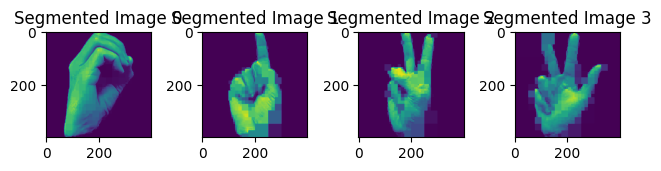

In [42]:
plt.subplot(1, 4, 1)
plt.imshow(segmented_image0)
plt.title('Segmented Image 0')

plt.subplot(1, 4, 2)
plt.imshow(segmented_image1)
plt.title('Segmented Image 1')

plt.subplot(1, 4, 3)
plt.imshow(segmented_image2)
plt.title('Segmented Image 2')

plt.subplot(1, 4, 4)
plt.imshow(segmented_image3)
plt.title('Segmented Image 3')
plt.tight_layout()
plt.show()

In [7]:
import torch
print(torch.__version__)


2.5.1+cpu


In [9]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [11]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Preprocessing: Define transforms for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the full dataset
dataset = ImageFolder(root=r"D:\DLS\asl_clipped", transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # Remaining 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load pretrained model (ResNet-18)
model = models.resnet18(pretrained=True)

# Modify the fully connected layer to match the number of classes
num_classes = len(dataset.classes)  # Number of output classes
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 2
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")

# Validation loop
model.eval()
val_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100*correct/total:.2f}%")

# Save the trained model
torch.save(model, "trained_resnet18.pth")
print("Model saved as 'trained_resnet18.pth'")


Epoch 1/2, Loss: 0.2839, Accuracy: 87.80%
Epoch 2/2, Loss: 0.0038, Accuracy: 100.00%
Validation Loss: 0.0274, Validation Accuracy: 100.00%
Model saved as 'trained_resnet18.pth'


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(10, 30, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(30, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)  # Adjusted for input size 128x128
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load the full dataset
dataset = ImageFolder(root=r"D:\DLS\asl_clipped", transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # Remaining 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model = SimpleCNN(num_classes=5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total:.2f}%")


Epoch 1/10, Loss: 1.478334108988444
Epoch 2/10, Loss: 0.6506616257958941
Epoch 3/10, Loss: 0.18382932007726696
Epoch 4/10, Loss: 0.08611282064682907
Epoch 5/10, Loss: 0.06876577550752296
Epoch 6/10, Loss: 0.057172911448611155
Epoch 7/10, Loss: 0.05285807731302662
Epoch 8/10, Loss: 0.02945234404048986
Epoch 9/10, Loss: 0.0160720873172977
Epoch 10/10, Loss: 0.010207354401548704
Validation Accuracy: 100.00%


In [17]:
from PIL import Image
#load model
#model = torch.load("Model Name")

# Define the function to predict a single image
def predict_image(image_path, model, class_names):
    """
    Predict the class of a given image.

    Args:
        image_path (str): Path to the input image.
        model (torch.nn.Module): Trained PyTorch model.
        class_names (list): List of class names corresponding to model outputs.

    Returns:
        str: Predicted class name.
    """
    # Preprocessing: Define transforms (same as used during training)
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load the image
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    # Move model and image to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    image = image.to(device)

    # Set the model to evaluation mode
    model.eval()
    with torch.no_grad():
        # Forward pass
        outputs = model(image)
        _, predicted = outputs.max(1)  # Get the class index with highest probability

    return class_names[predicted.item()]


In [41]:
predict_image(r"D:\DLS\asl_clipped\4\hand1_4_bot_seg_3_cropped.jpeg",model,[0,1,2,3,4])

4

## **Final Model Prediction**

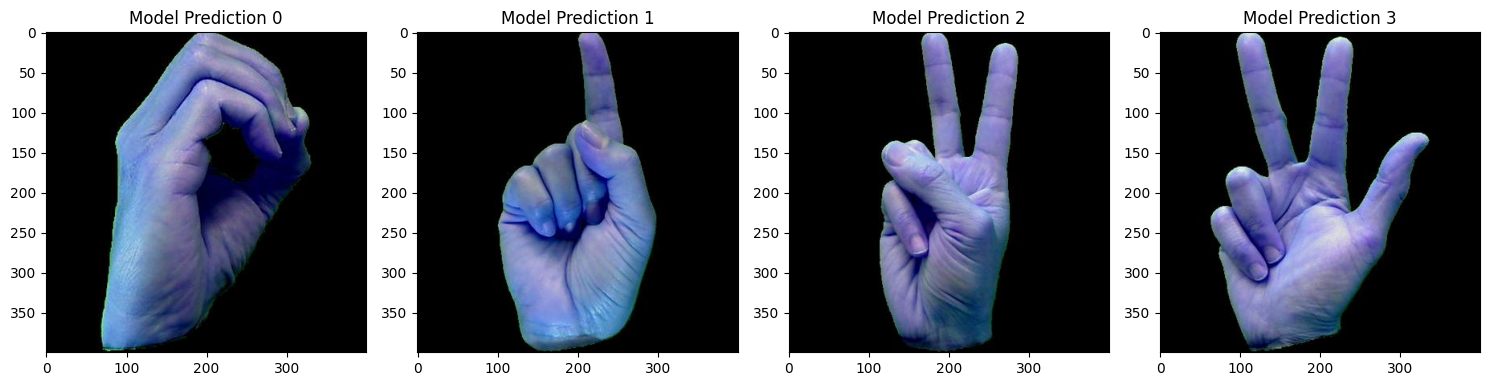

In [42]:
image_valid0=cv2.imread('hand1_0_left_seg_2_cropped.jpeg')
image_valid1=cv2.imread('hand2_1_bot_seg_5_cropped.jpeg')
image_valid2=cv2.imread('hand1_2_top_seg_2_cropped.jpeg')
image_valid3=cv2.imread('hand1_3_top_seg_3_cropped.jpeg')

plt.figure(figsize=(15, 10))

# Original images
plt.subplot(1, 4, 1)
plt.imshow(image_valid0, cmap='gray')
plt.title(f"Model Prediction {predict_image(r"hand1_0_left_seg_2_cropped.jpeg",model,[0,1,2,3,4])}")

plt.subplot(1, 4, 2)
plt.imshow(image_valid1, cmap='gray')
plt.title(f"Model Prediction {predict_image(r"hand2_1_bot_seg_5_cropped.jpeg",model,[0,1,2,3,4])}")

plt.subplot(1, 4, 3)
plt.imshow(image_valid2, cmap='gray')
plt.title(f"Model Prediction {predict_image(r"hand1_2_top_seg_2_cropped.jpeg",model,[0,1,2,3,4])}")

plt.subplot(1, 4, 4)
plt.imshow(image_valid3, cmap='gray')
plt.title(f"Model Prediction {predict_image(r"hand1_3_top_seg_3_cropped.jpeg",model,[0,1,2,3,4])}")


plt.tight_layout()
plt.show()


In [ ]:
import cv2
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load your PyTorch model
model.eval()  # Set the model to evaluation mode

# Define the transformation for the input frames
transform = transforms.Compose([
    transforms.ToPILImage(),  # Convert OpenCV image to PIL image
    transforms.Resize((224, 224)),  # Resize to the size your model expects
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Open the webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break

    # Preprocess the frame
    input_tensor = transform(frame).unsqueeze(0)  # Add batch dimension
    input_tensor = input_tensor.to('cuda' if torch.cuda.is_available() else 'cpu')  # Send to GPU if available

    # Perform inference
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = outputs.max(1)  # Get the class with the highest score

    # Display the prediction on the frame
    class_label = f"Class: {predicted.item()}"  # Replace with your class label mapping if needed
    cv2.putText(frame, class_label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Show the frame with the prediction
    cv2.imshow('Webcam Feed', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()
